In [1]:
pip install livelossplot

In [2]:
# Pemanggilan Pustaka
import numpy as np
import pandas as pd
import re
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.activations import softmax, relu
from livelossplot import PlotLossesKeras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## Pendefinisian Modul Pembersihan Data
list_baku = pd.read_csv("/content/drive/My Drive/Data/list_kata_baku.csv", encoding='ISO-8859-1')

def clean_text(tweet):
    
    # Convert to lower case
    tweet = tweet.lower()
    
    # Clean www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    # Clean @username
    tweet = re.sub('@[^\s]+','',tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    # Clean punctuation
    tweet = re.sub(r"[^\w\s]",' ', tweet)
    # Clean number
    tweet = re.sub(r"[\d-]",'', tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #trim
    #tweet = tweet.strip('\'"')

    # Clean per Words
    words = tweet.split()
    tokens=[]
    for ww in words:
        #split repeated word
        for w in re.split(r'[-/\s]\s*', ww):
            #replace two or more with two occurrences
            pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
            w = pattern.sub(r"\1\1", w)
            #check if the word cosists of two or more alphabets
            val = re.search(r"^[a-zA-Z][a-zA-Z][a-zA-Z]*$", w)
            #add tokens
            if(w in list_baku):
                x=np.array(list_baku[list_baku["spell"]==w]["word"])
                w=x[0]
                tokens.append(w.lower())
            elif(w == 'rt' or val is None):
                continue
            else:
                tokens.append(w.lower())
    tweet = " ".join(tokens)
    return tweet

In [5]:
# Source Domain
# -------------

## Memuat semua data
sd1 = pd.read_csv("/content/drive/My Drive/Data/Capres_skripsi.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
sd2 = pd.read_csv("/content/drive/My Drive/Data/Ecom.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
sd3 = pd.read_csv("/content/drive/My Drive/Data/Shopback.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
sd4 = pd.read_csv("/content/drive/My Drive/Data/Grab.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
sd5 = pd.read_csv("/content/drive/My Drive/Data/Jenius.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
dt = pd.read_csv("/content/drive/My Drive/Data/DANA.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')


## Prapengolahan: mengganti nilai sentimen {-1,1} menjadi {0,1}
sd1['Sentimen'] = sd1['Sentimen'].replace(-1,0)
sd2['Sentimen'] = sd2['Sentimen'].replace(-1,0)
sd3['Sentimen'] = sd3['Sentimen'].replace(-1,0)
sd4['Sentimen'] = sd4['Sentimen'].replace(-1,0)
sd5['Sentimen'] = sd5['Sentimen'].replace(-1,0)
dt['Sentimen'] = dt['Sentimen'].replace(-1,0)


## Prapengolahan: pembersihan dataset
sd1['Teks'] = sd1['Teks'].map(lambda x: clean_text(x))
sd1 = sd1[sd1['Teks'].apply(lambda x: len(x.split()) >=1)]
sd2['Teks'] = sd2['Teks'].map(lambda x: clean_text(x))
sd2 = sd2[sd2['Teks'].apply(lambda x: len(x.split()) >=1)]
sd3['Teks'] = sd3['Teks'].map(lambda x: clean_text(x))
sd3 = sd3[sd3['Teks'].apply(lambda x: len(x.split()) >=1)]
sd4['Teks'] = sd4['Teks'].map(lambda x: clean_text(x))
sd4 = sd4[sd4['Teks'].apply(lambda x: len(x.split()) >=1)]
sd5['Teks'] = sd5['Teks'].map(lambda x: clean_text(x))
sd5 = sd5[sd5['Teks'].apply(lambda x: len(x.split()) >=1)]
dt['Teks'] = dt['Teks'].map(lambda x: clean_text(x))
dt = dt[dt['Teks'].apply(lambda x: len(x.split()) >=1)]

## Prapengolahan: tokenisasi
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sd1['Teks'])

## Prapengolahan: sequencing
sequences = tokenizer.texts_to_sequences(sd1['Teks'])
sd1_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd1_labels = np.array((sd1['Sentimen']))
sd1_labels = pd.get_dummies(sd1_labels)
sequences = tokenizer.texts_to_sequences(sd2['Teks'])
sd2_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd2_labels = np.array((sd2['Sentimen']))
sd2_labels = pd.get_dummies(sd2_labels)
sequences = tokenizer.texts_to_sequences(sd3['Teks'])
sd3_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd3_labels = np.array((sd3['Sentimen']))
sd3_labels = pd.get_dummies(sd3_labels)
sequences = tokenizer.texts_to_sequences(sd4['Teks'])
sd4_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd4_labels = np.array((sd4['Sentimen']))
sd4_labels = pd.get_dummies(sd4_labels)
sequences = tokenizer.texts_to_sequences(sd5['Teks'])
sd5_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd5_labels = np.array((sd5['Sentimen']))
sd5_labels = pd.get_dummies(sd5_labels)
sequences = tokenizer.texts_to_sequences(dt['Teks'])
dt_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
dt_labels = np.array((dt['Sentimen']))
dt_labels = pd.get_dummies(dt_labels)

sd1_data_train, sd1_data_test, sd1_labels_train, sd1_labels_test = train_test_split(sd1_data, sd1_labels, test_size=0.2, random_state=42, stratify= sd1_labels)
sd2_data_train, sd2_data_test, sd2_labels_train, sd2_labels_test = train_test_split(sd2_data, sd2_labels, test_size=0.2, random_state=42, stratify= sd2_labels)
sd3_data_train, sd3_data_test, sd3_labels_train, sd3_labels_test = train_test_split(sd3_data, sd3_labels, test_size=0.2, random_state=42, stratify= sd3_labels)
sd4_data_train, sd4_data_test, sd4_labels_train, sd4_labels_test = train_test_split(sd4_data, sd4_labels, test_size=0.2, random_state=42, stratify= sd4_labels)
sd5_data_train, sd5_data_test, sd5_labels_train, sd5_labels_test = train_test_split(sd5_data, sd5_labels, test_size=0.2, random_state=42, stratify= sd5_labels)

In [6]:
vocabulary_size = len(tokenizer.word_index) + 1 
sequence_length = sd1_data.shape[1]                    
batch_size      = 32       

# 1. CNN


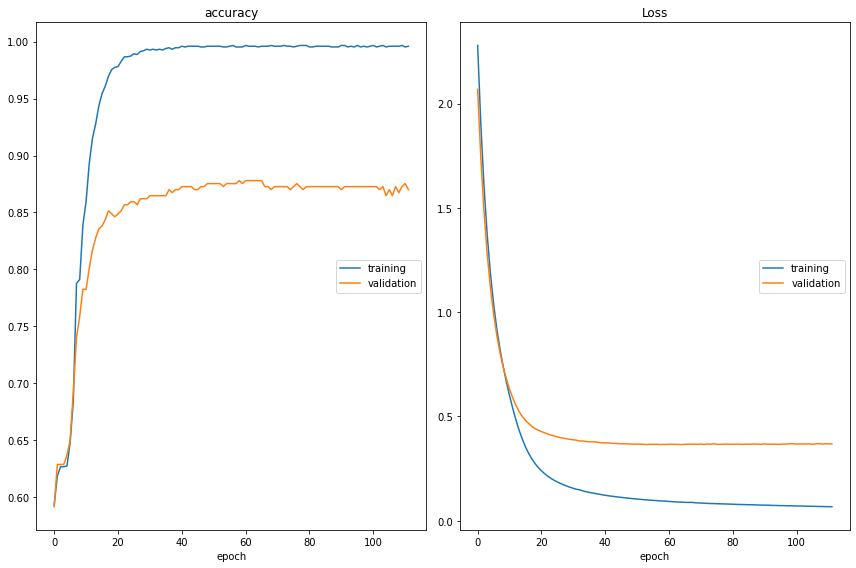

accuracy
	training         	 (min:    0.593, max:    0.997, cur:    0.996)
	validation       	 (min:    0.592, max:    0.878, cur:    0.870)
Loss
	training         	 (min:    0.067, max:    2.278, cur:    0.067)
	validation       	 (min:    0.365, max:    2.068, cur:    0.369)
37/37 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.6970
Source Accuracy:
Model CNN: [0.8726790547370911]
Target Accuracy:
Model CNN: [0.6970213055610657]


In [204]:
source_acc_1 = []
target_acc_1 = []

checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                               save_weights_only=True,
                                                               monitor='val_loss',
                                                               mode='min',
                                                               save_best_only=True)

#CNN
inputs = keras.layers.Input(shape=(sequence_length,))
embedding = keras.layers.Embedding(vocabulary_size, 128)(inputs)
conv = keras.layers.Conv1D(300, 5, activation='relu',kernel_regularizer= keras.regularizers.l2(0.01))(embedding)
pool = keras.layers.GlobalMaxPooling1D()(conv)
output = keras.layers.Dense(2, activation='softmax',kernel_regularizer= keras.regularizers.l2(0.001))(pool)
modelcnn  = keras.models.Model(inputs=inputs, outputs=output)
modelcnn.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history11 = modelcnn.fit(sd1_data_train, sd1_labels_train, epochs=112, batch_size=batch_size,validation_data=(sd1_data_test, sd1_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

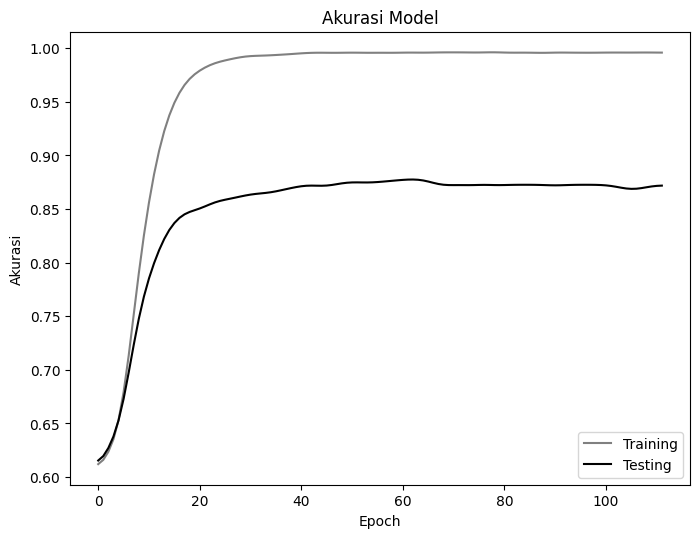

In [205]:
import keras
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed_train = gaussian_filter1d(history11.history['accuracy'], sigma=2)
ysmoothed_val = gaussian_filter1d(history11.history['val_accuracy'], sigma=2)
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ysmoothed_train,color="gray")
plt.plot(ysmoothed_val,color="black")
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='lower right')
plt.show()

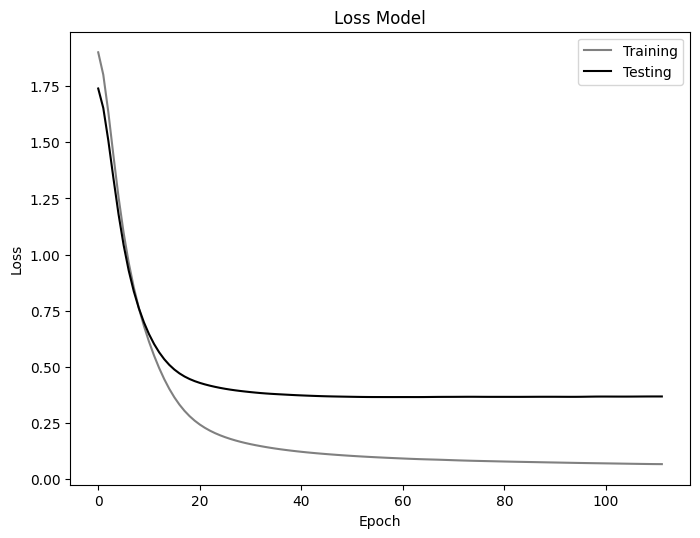

In [206]:
import keras
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed_train = gaussian_filter1d(history11.history['loss'], sigma=2)
ysmoothed_val = gaussian_filter1d(history11.history['val_loss'], sigma=2)
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ysmoothed_train,color="gray")
plt.plot(ysmoothed_val,color="black")
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper right')
plt.show()

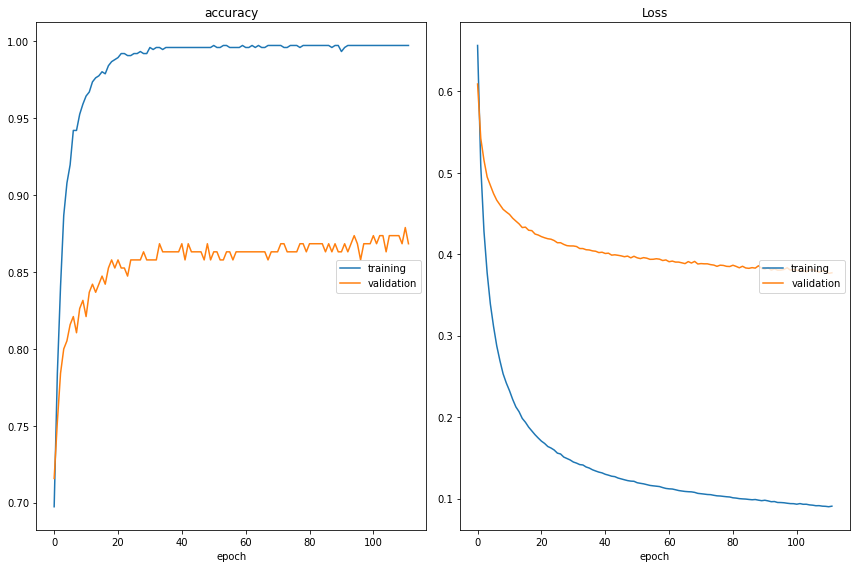

accuracy
	training         	 (min:    0.697, max:    0.997, cur:    0.997)
	validation       	 (min:    0.716, max:    0.879, cur:    0.868)
Loss
	training         	 (min:    0.090, max:    0.656, cur:    0.091)
	validation       	 (min:    0.376, max:    0.609, cur:    0.377)
37/37 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.8366
Source Accuracy:
Model CNN: [0.8726790547370911, 0.8275862336158752]
Target Accuracy:
Model CNN: [0.6970213055610657, 0.8365957736968994]


In [207]:

checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history12 = modelcnn.fit(sd2_data_train, sd2_labels_train, 
                epochs=112, 
                batch_size=batch_size,
                validation_data=(sd2_data_test, sd2_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

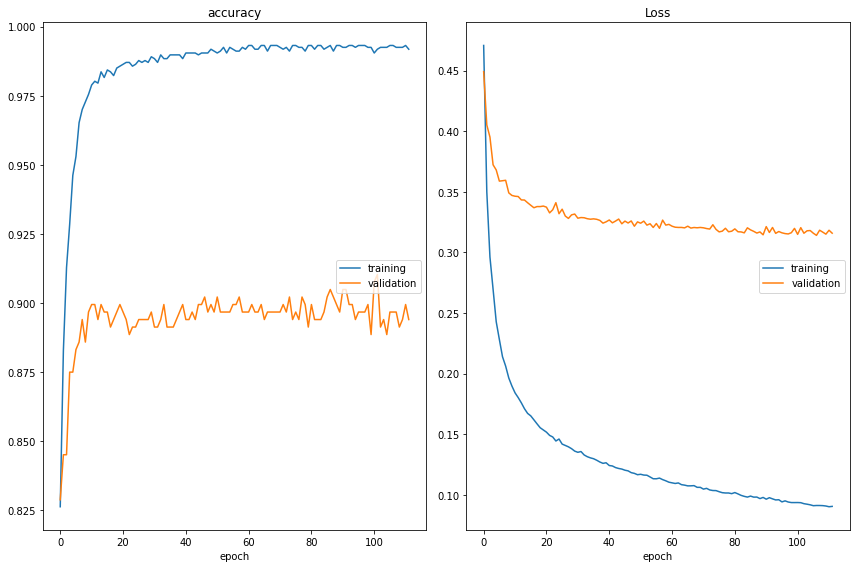

accuracy
	training         	 (min:    0.826, max:    0.993, cur:    0.992)
	validation       	 (min:    0.829, max:    0.910, cur:    0.894)
Loss
	training         	 (min:    0.090, max:    0.471, cur:    0.091)
	validation       	 (min:    0.314, max:    0.449, cur:    0.316)
37/37 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8528
Source Accuracy:
Model CNN: [0.8726790547370911, 0.8275862336158752, 0.7188329100608826]
Target Accuracy:
Model CNN: [0.6970213055610657, 0.8365957736968994, 0.8527659773826599]


In [208]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_3'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history13 = modelcnn.fit(sd3_data_train, sd3_labels_train, 
                epochs=112, 
                batch_size=batch_size,
                validation_data=(sd3_data_test, sd3_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

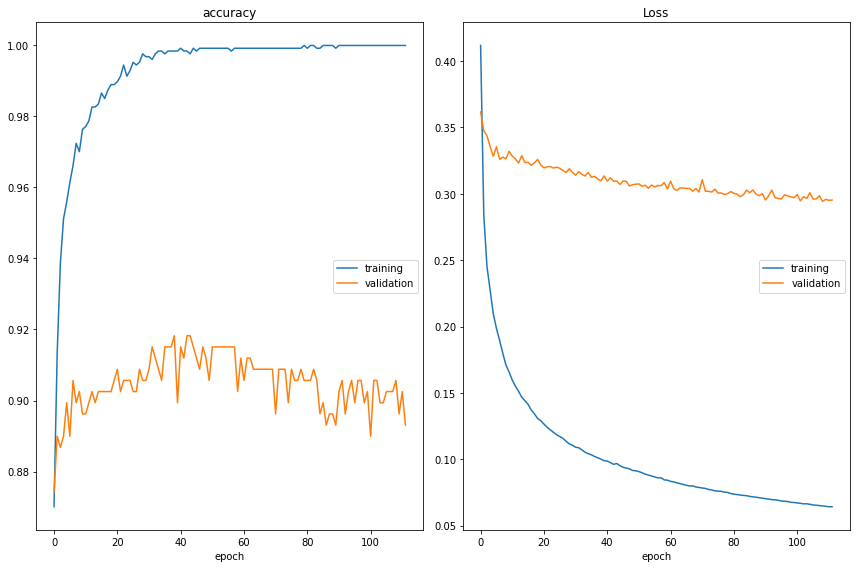

accuracy
	training         	 (min:    0.870, max:    1.000, cur:    1.000)
	validation       	 (min:    0.874, max:    0.918, cur:    0.893)
Loss
	training         	 (min:    0.064, max:    0.412, cur:    0.064)
	validation       	 (min:    0.294, max:    0.362, cur:    0.295)
37/37 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.8553
Source Accuracy:
Model CNN: [0.8726790547370911, 0.8275862336158752, 0.7188329100608826, 0.7347480058670044]
Target Accuracy:
Model CNN: [0.6970213055610657, 0.8365957736968994, 0.8527659773826599, 0.8553191423416138]


In [209]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_4'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history14 = modelcnn.fit(sd4_data_train, sd4_labels_train, 
                epochs=112, 
                batch_size=batch_size,
                validation_data=(sd4_data_test, sd4_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

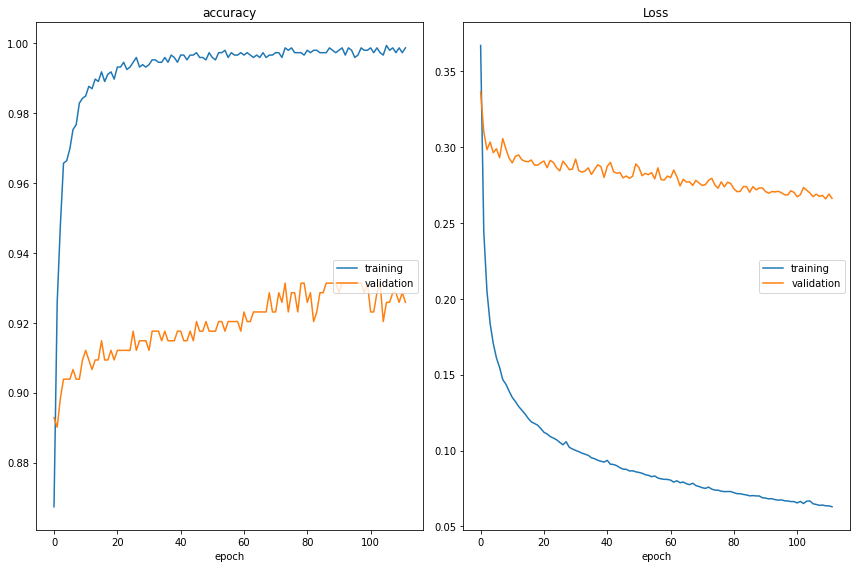

accuracy
	training         	 (min:    0.867, max:    0.999, cur:    0.999)
	validation       	 (min:    0.890, max:    0.931, cur:    0.926)
Loss
	training         	 (min:    0.063, max:    0.367, cur:    0.063)
	validation       	 (min:    0.266, max:    0.337, cur:    0.266)
37/37 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.8519
Source Accuracy:
Model CNN: [0.8726790547370911, 0.8275862336158752, 0.7188329100608826, 0.7347480058670044, 0.7241379022598267]
Target Accuracy:
Model CNN: [0.6970213055610657, 0.8365957736968994, 0.8527659773826599, 0.8553191423416138, 0.8519148826599121]


In [210]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history15 = modelcnn.fit(sd5_data_train, sd5_labels_train, 
                epochs=112, 
                batch_size=batch_size,
                validation_data=(sd5_data_test, sd5_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

#2. LSTM

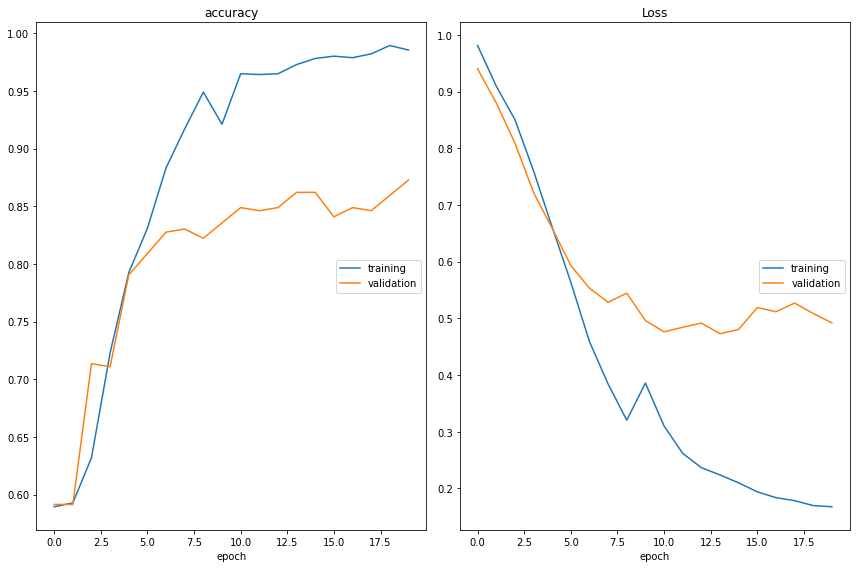

accuracy
	training         	 (min:    0.590, max:    0.989, cur:    0.985)
	validation       	 (min:    0.592, max:    0.873, cur:    0.873)
Loss
	training         	 (min:    0.168, max:    0.981, cur:    0.168)
	validation       	 (min:    0.473, max:    0.940, cur:    0.492)
37/37 [==============================] - 0s 4ms/step - loss: 0.7952 - accuracy: 0.7226
Source Accuracy:
Model LSTM: [0.8620689511299133]
Target Accuracy:
Model LSTM: [0.7225531935691833]


In [211]:
source_acc_2 = []
target_acc_2 = []

checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

inputs = keras.layers.Input(shape=(sequence_length,))
embedding = keras.layers.Embedding(vocabulary_size, 64)(inputs)
LSTM = keras.layers.LSTM(200,kernel_regularizer= keras.regularizers.l2(0.001), 
                              recurrent_regularizer= keras.regularizers.l2(0.001))(embedding)
output = keras.layers.Dense(2, activation='softmax',kernel_regularizer= keras.regularizers.l2(0.001))(LSTM)
modellstm  = keras.models.Model(inputs=inputs, outputs=output)
modellstm.compile(optimizer=Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history21 = modellstm.fit(sd1_data_train, sd1_labels_train, epochs=20, batch_size=batch_size,validation_data=(sd1_data_test, sd1_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

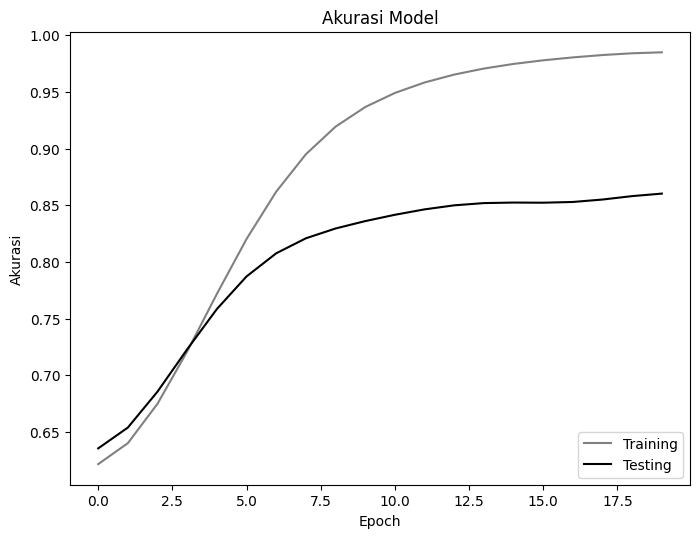

In [212]:
import keras
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed_train = gaussian_filter1d(history21.history['accuracy'], sigma=2)
ysmoothed_val = gaussian_filter1d(history21.history['val_accuracy'], sigma=2)
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ysmoothed_train,color="gray")
plt.plot(ysmoothed_val,color="black")
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='lower right')
plt.show()

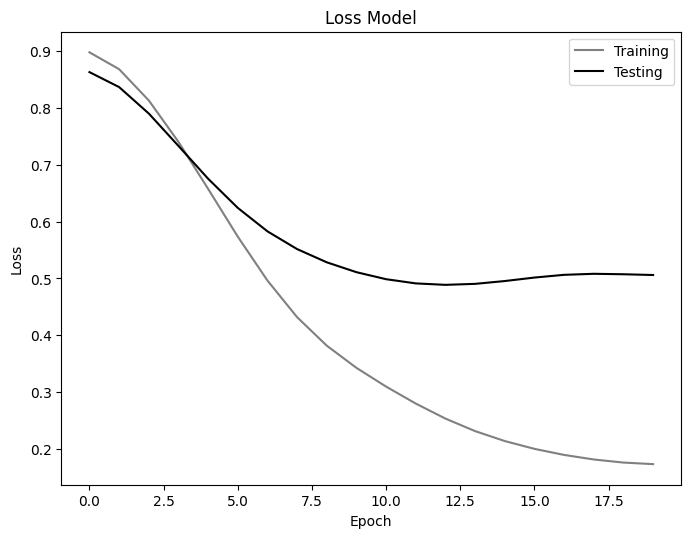

In [213]:
import keras
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed_train = gaussian_filter1d(history21.history['loss'], sigma=2)
ysmoothed_val = gaussian_filter1d(history21.history['val_loss'], sigma=2)
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ysmoothed_train,color="gray")
plt.plot(ysmoothed_val,color="black")
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper right')
plt.show()

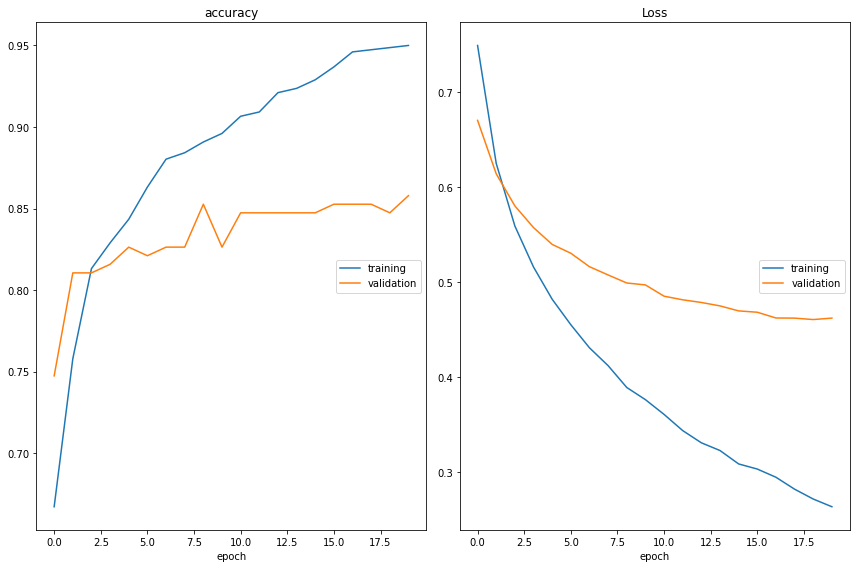

accuracy
	training         	 (min:    0.667, max:    0.950, cur:    0.950)
	validation       	 (min:    0.747, max:    0.858, cur:    0.858)
Loss
	training         	 (min:    0.263, max:    0.749, cur:    0.263)
	validation       	 (min:    0.461, max:    0.671, cur:    0.462)
37/37 [==============================] - 0s 4ms/step - loss: 0.8017 - accuracy: 0.7864
Source Accuracy:
Model LSTM: [0.8620689511299133, 0.8328912258148193]
Target Accuracy:
Model LSTM: [0.7225531935691833, 0.7863829731941223]


In [214]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history22 = modellstm.fit(sd2_data_train, sd2_labels_train, epochs=20, batch_size=batch_size,validation_data=(sd2_data_test, sd2_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

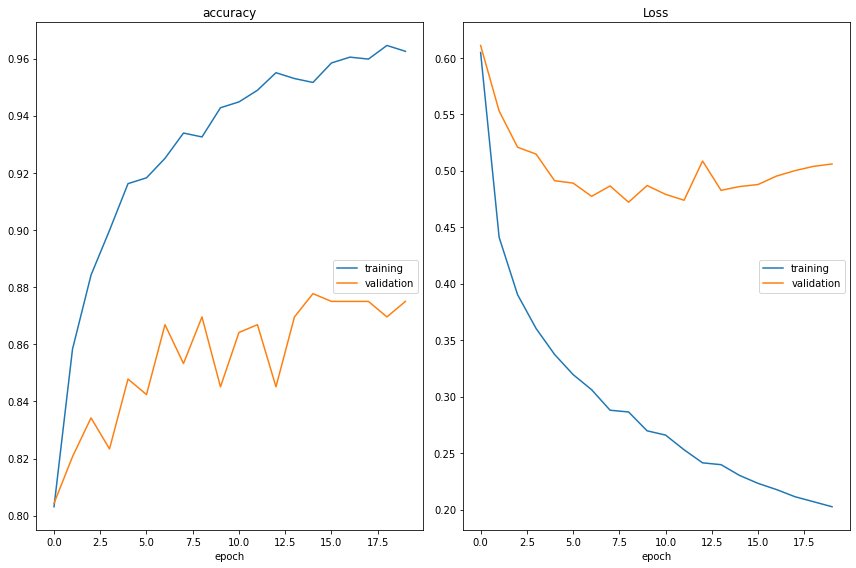

accuracy
	training         	 (min:    0.803, max:    0.965, cur:    0.963)
	validation       	 (min:    0.804, max:    0.878, cur:    0.875)
Loss
	training         	 (min:    0.202, max:    0.605, cur:    0.202)
	validation       	 (min:    0.472, max:    0.611, cur:    0.506)
37/37 [==============================] - 0s 4ms/step - loss: 0.5306 - accuracy: 0.8417
Source Accuracy:
Model LSTM: [0.8620689511299133, 0.8328912258148193, 0.8328912258148193]
Target Accuracy:
Model LSTM: [0.7225531935691833, 0.7863829731941223, 0.8417021036148071]


In [215]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_3'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history23 = modellstm.fit(sd3_data_train, sd3_labels_train, 
                epochs=20, 
                batch_size=batch_size,
                validation_data=(sd3_data_test, sd3_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

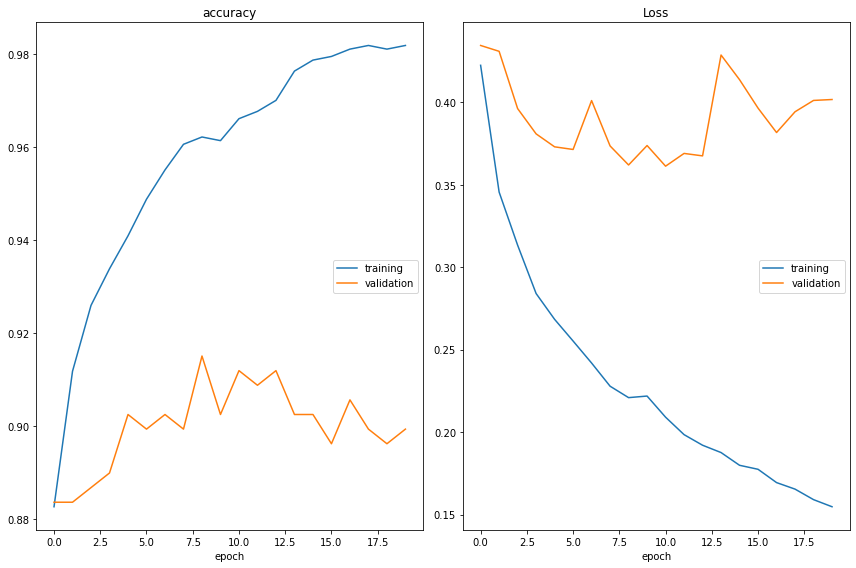

accuracy
	training         	 (min:    0.883, max:    0.982, cur:    0.982)
	validation       	 (min:    0.884, max:    0.915, cur:    0.899)
Loss
	training         	 (min:    0.155, max:    0.422, cur:    0.155)
	validation       	 (min:    0.361, max:    0.434, cur:    0.402)
37/37 [==============================] - 0s 4ms/step - loss: 0.4702 - accuracy: 0.8468
Source Accuracy:
Model LSTM: [0.8620689511299133, 0.8328912258148193, 0.8328912258148193, 0.8488063812255859]
Target Accuracy:
Model LSTM: [0.7225531935691833, 0.7863829731941223, 0.8417021036148071, 0.8468084931373596]


In [216]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_4'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history24 = modellstm.fit(sd4_data_train, sd4_labels_train, epochs=20, batch_size=batch_size,validation_data=(sd4_data_test, sd4_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

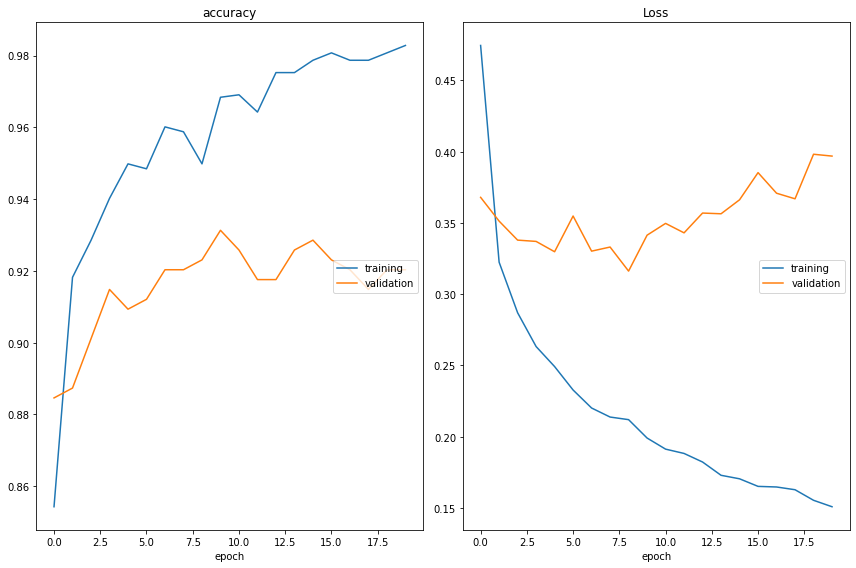

accuracy
	training         	 (min:    0.854, max:    0.983, cur:    0.983)
	validation       	 (min:    0.885, max:    0.931, cur:    0.920)
Loss
	training         	 (min:    0.151, max:    0.475, cur:    0.151)
	validation       	 (min:    0.316, max:    0.398, cur:    0.397)
37/37 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.8306
Source Accuracy:
Model LSTM: [0.8620689511299133, 0.8328912258148193, 0.8328912258148193, 0.8488063812255859, 0.8143236041069031]
Target Accuracy:
Model LSTM: [0.7225531935691833, 0.7863829731941223, 0.8417021036148071, 0.8468084931373596, 0.8306382894515991]


In [217]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history25 = modellstm.fit(sd5_data_train, sd5_labels_train, epochs=20, batch_size=batch_size,validation_data=(sd5_data_test, sd5_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

# 3. CNN-LSTM

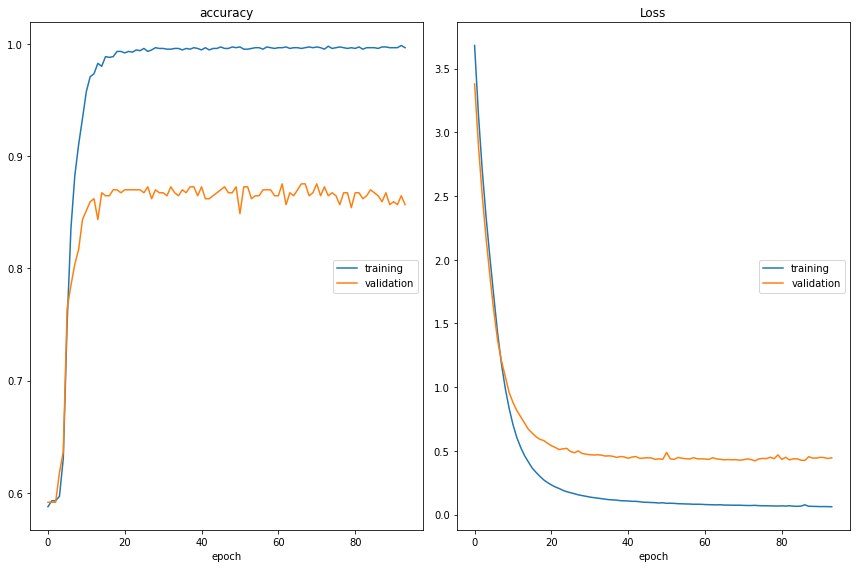

accuracy
	training         	 (min:    0.588, max:    0.999, cur:    0.997)
	validation       	 (min:    0.592, max:    0.875, cur:    0.857)
Loss
	training         	 (min:    0.062, max:    3.682, cur:    0.062)
	validation       	 (min:    0.422, max:    3.380, cur:    0.446)
37/37 [==============================] - 0s 3ms/step - loss: 0.7835 - accuracy: 0.7319
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078]
Target Accuracy:
Model CNN-LSTM: [0.7319148778915405]


In [218]:
source_acc_3 = []
target_acc_3 = []

checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

inputs = keras.layers.Input(shape=(sequence_length,))
embedding = keras.layers.Embedding(vocabulary_size, 64)(inputs)
conv = keras.layers.Conv1D(200, 3, activation='relu',kernel_regularizer= keras.regularizers.l2(0.01))(embedding)
pool = keras.layers.MaxPooling1D(2)(conv)
LSTM = keras.layers.LSTM(200,kernel_regularizer= keras.regularizers.l2(0.001), 
                              recurrent_regularizer= keras.regularizers.l2(0.01))(pool)
output = keras.layers.Dense(2, activation='softmax',kernel_regularizer= keras.regularizers.l2(0.001))(LSTM)
modelcnnlstm = keras.models.Model(inputs=inputs, outputs=output)
modelcnnlstm.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history31 = modelcnnlstm.fit(sd1_data_train, sd1_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd1_data_test, sd1_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

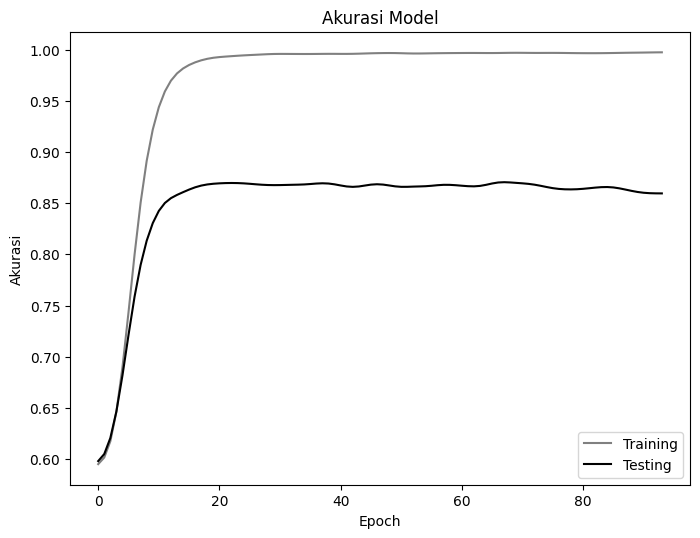

In [219]:
import keras
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed_train = gaussian_filter1d(history31.history['accuracy'], sigma=2)
ysmoothed_val = gaussian_filter1d(history31.history['val_accuracy'], sigma=2)
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ysmoothed_train,color="gray")
plt.plot(ysmoothed_val,color="black")
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='lower right')
plt.show()

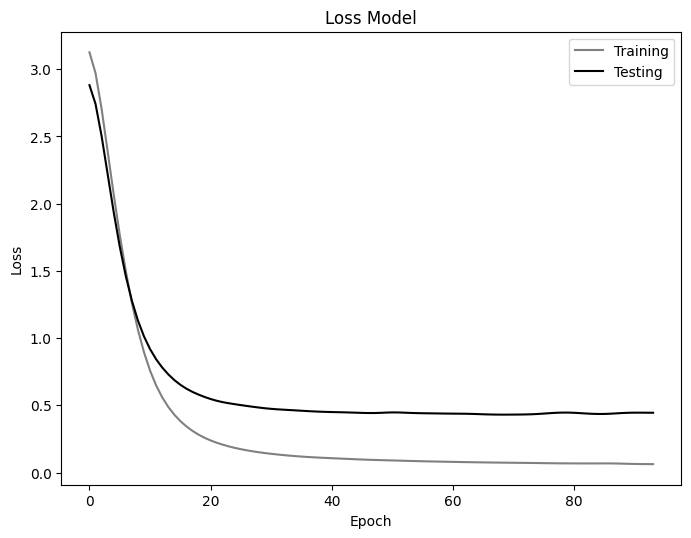

In [220]:
import keras
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed_train = gaussian_filter1d(history31.history['loss'], sigma=2)
ysmoothed_val = gaussian_filter1d(history31.history['val_loss'], sigma=2)
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ysmoothed_train,color="gray")
plt.plot(ysmoothed_val,color="black")
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper right')
plt.show()

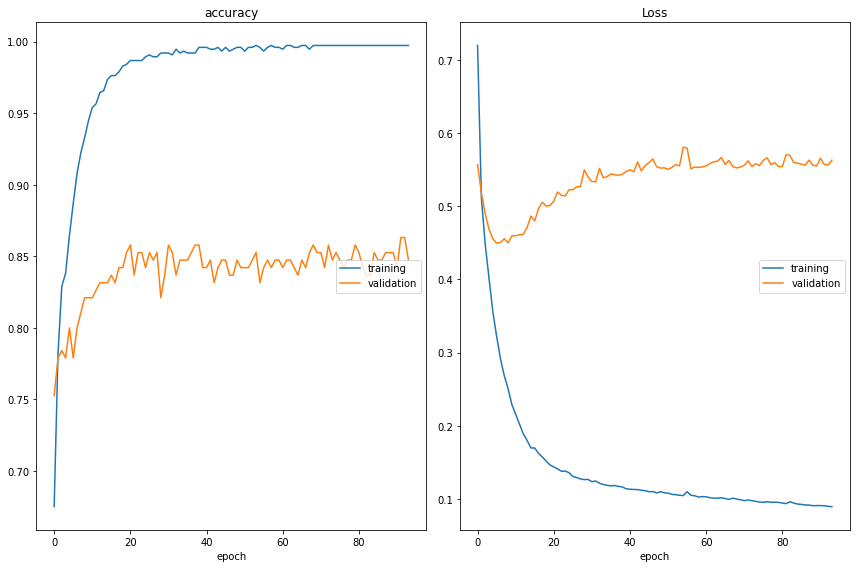

accuracy
	training         	 (min:    0.675, max:    0.997, cur:    0.997)
	validation       	 (min:    0.753, max:    0.863, cur:    0.847)
Loss
	training         	 (min:    0.089, max:    0.720, cur:    0.089)
	validation       	 (min:    0.450, max:    0.581, cur:    0.563)
37/37 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.8179
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078, 0.8435013294219971]
Target Accuracy:
Model CNN-LSTM: [0.7319148778915405, 0.8178723454475403]


In [221]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history32 = modelcnnlstm.fit(sd2_data_train, sd2_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd2_data_test, sd2_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

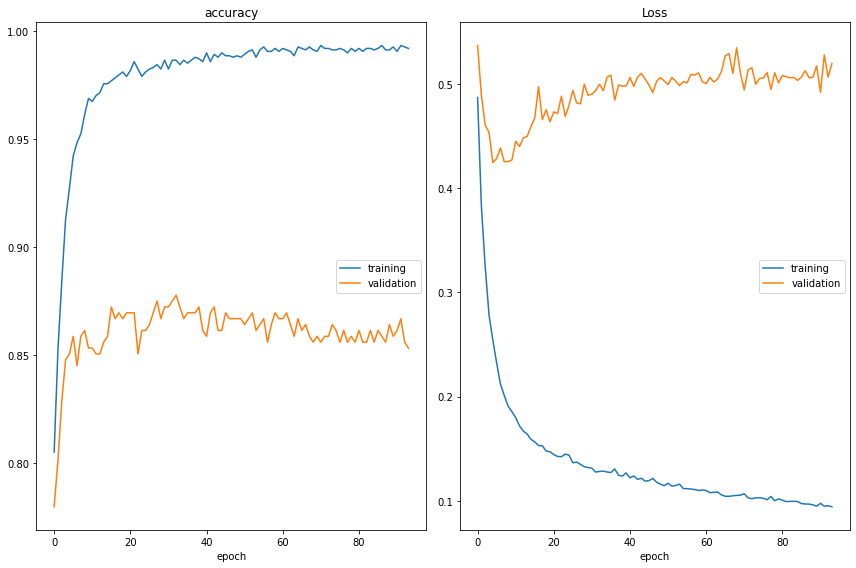

accuracy
	training         	 (min:    0.805, max:    0.993, cur:    0.992)
	validation       	 (min:    0.780, max:    0.878, cur:    0.853)
Loss
	training         	 (min:    0.094, max:    0.487, cur:    0.094)
	validation       	 (min:    0.425, max:    0.537, cur:    0.520)
37/37 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.8340
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078, 0.8435013294219971, 0.8063660264015198]
Target Accuracy:
Model CNN-LSTM: [0.7319148778915405, 0.8178723454475403, 0.8340425491333008]


In [222]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_3'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history33 = modelcnnlstm.fit(sd3_data_train, sd3_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd3_data_test, sd3_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

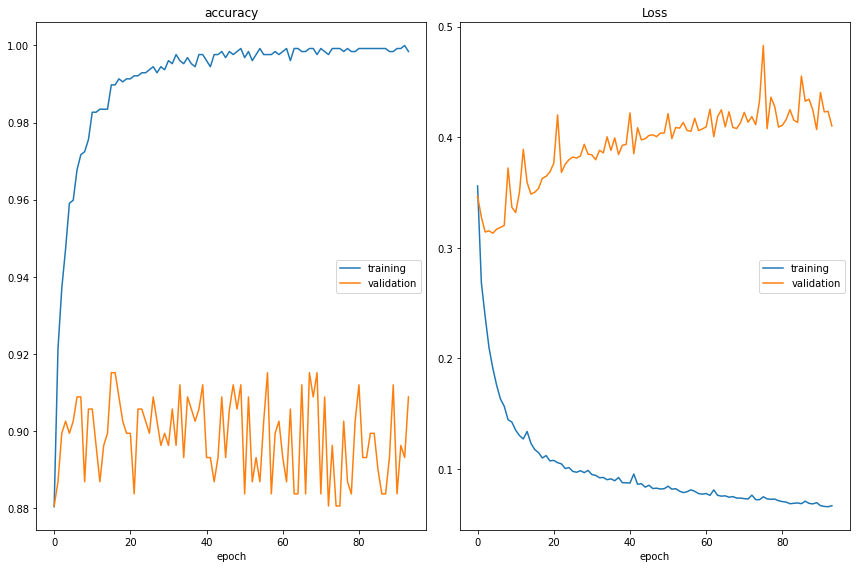

accuracy
	training         	 (min:    0.880, max:    1.000, cur:    0.998)
	validation       	 (min:    0.881, max:    0.915, cur:    0.909)
Loss
	training         	 (min:    0.066, max:    0.356, cur:    0.067)
	validation       	 (min:    0.313, max:    0.483, cur:    0.410)
37/37 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.8502
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078, 0.8435013294219971, 0.8063660264015198, 0.8328912258148193]
Target Accuracy:
Model CNN-LSTM: [0.7319148778915405, 0.8178723454475403, 0.8340425491333008, 0.8502127528190613]


In [223]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_4'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history34 = modelcnnlstm.fit(sd4_data_train, sd4_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd4_data_test, sd4_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

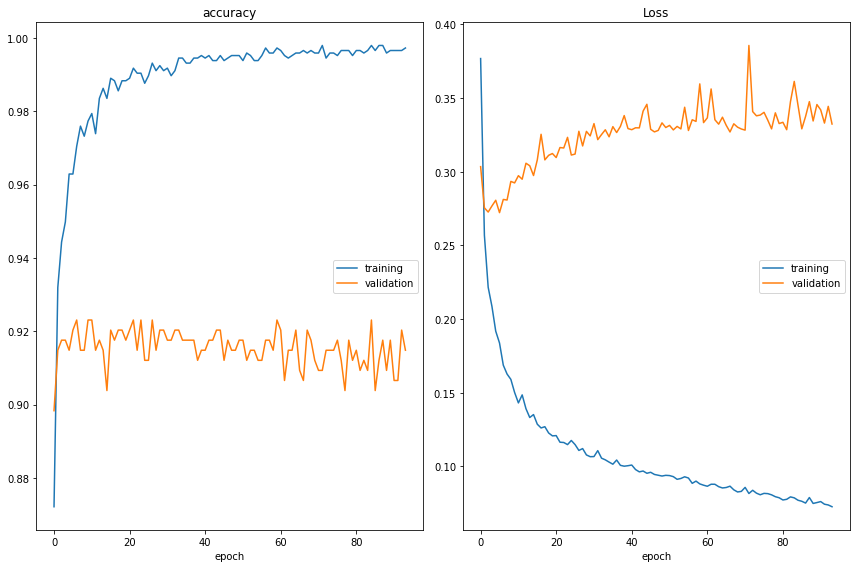

accuracy
	training         	 (min:    0.872, max:    0.998, cur:    0.997)
	validation       	 (min:    0.898, max:    0.923, cur:    0.915)
Loss
	training         	 (min:    0.073, max:    0.377, cur:    0.073)
	validation       	 (min:    0.272, max:    0.386, cur:    0.332)
37/37 [==============================] - 0s 4ms/step - loss: 0.4101 - accuracy: 0.8715
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078, 0.8435013294219971, 0.8063660264015198, 0.8328912258148193, 0.7824933528900146]
Target Accuracy:
Model CNN-LSTM: [0.7319148778915405, 0.8178723454475403, 0.8340425491333008, 0.8502127528190613, 0.8714893460273743]


In [224]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history35 = modelcnnlstm.fit(sd5_data_train, sd5_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd5_data_test, sd5_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

#4. LSTM-CNN

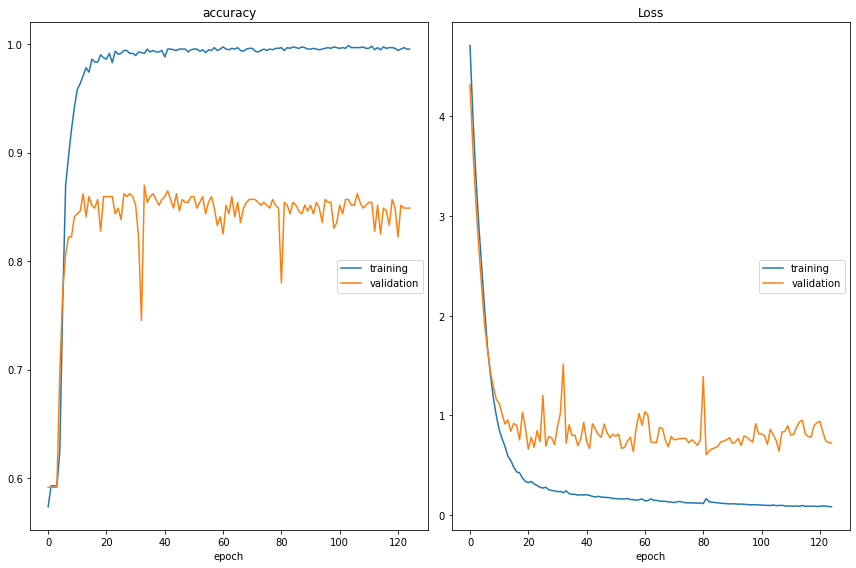

accuracy
	training         	 (min:    0.574, max:    0.999, cur:    0.995)
	validation       	 (min:    0.592, max:    0.870, cur:    0.849)
Loss
	training         	 (min:    0.084, max:    4.713, cur:    0.084)
	validation       	 (min:    0.607, max:    4.319, cur:    0.724)
37/37 [==============================] - 0s 5ms/step - loss: 0.9168 - accuracy: 0.7438
Source Accuracy:
Model LSTM-CNN: [0.8541114330291748]
Target Accuracy:
Model LSTM-CNN: [0.7438297867774963]


In [225]:
#LSTM-CNN

source_acc_4 = []
target_acc_4 = []

checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

inputs = keras.layers.Input(shape=(sequence_length,))
embedding = keras.layers.Embedding(vocabulary_size, 128)(inputs)
LSTM = keras.layers.LSTM(200,kernel_regularizer= keras.regularizers.l2(0.01), 
                              recurrent_regularizer= keras.regularizers.l2(0.001),return_sequences=True)(embedding)
conv = keras.layers.Conv1D(200, 3, activation='relu',kernel_regularizer= keras.regularizers.l2(0.01))(LSTM)
pool = keras.layers.GlobalMaxPooling1D()(conv)
output = keras.layers.Dense(2, activation='softmax',kernel_regularizer= keras.regularizers.l2(0.001))(pool)
modellstmcnn  = keras.models.Model(inputs=inputs, outputs=output)
modellstmcnn.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history41 = modellstmcnn.fit(sd1_data_train, sd1_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd1_data_test, sd1_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

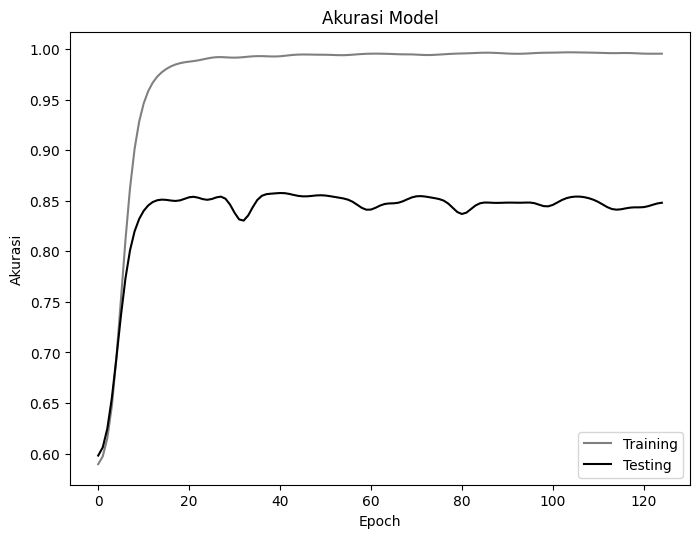

In [226]:
import keras
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed_train = gaussian_filter1d(history41.history['accuracy'], sigma=2)
ysmoothed_val = gaussian_filter1d(history41.history['val_accuracy'], sigma=2)
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ysmoothed_train,color="gray")
plt.plot(ysmoothed_val,color="black")
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='lower right')
plt.show()

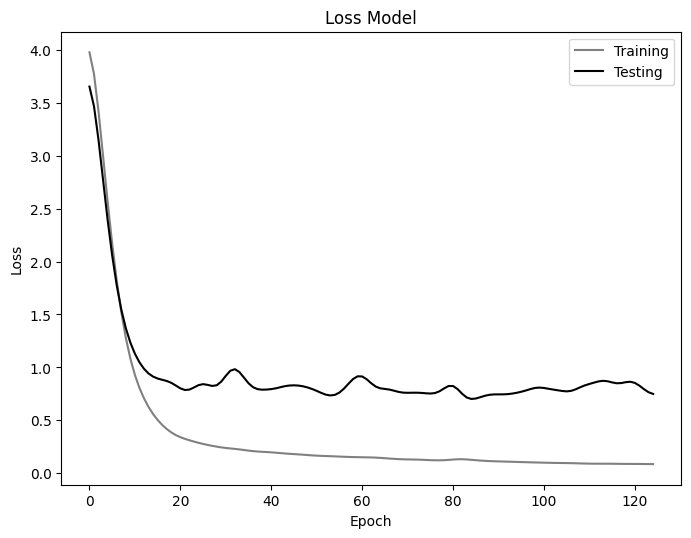

In [227]:
import keras
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed_train = gaussian_filter1d(history41.history['loss'], sigma=2)
ysmoothed_val = gaussian_filter1d(history41.history['val_loss'], sigma=2)
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ysmoothed_train,color="gray")
plt.plot(ysmoothed_val,color="black")
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper right')
plt.show()

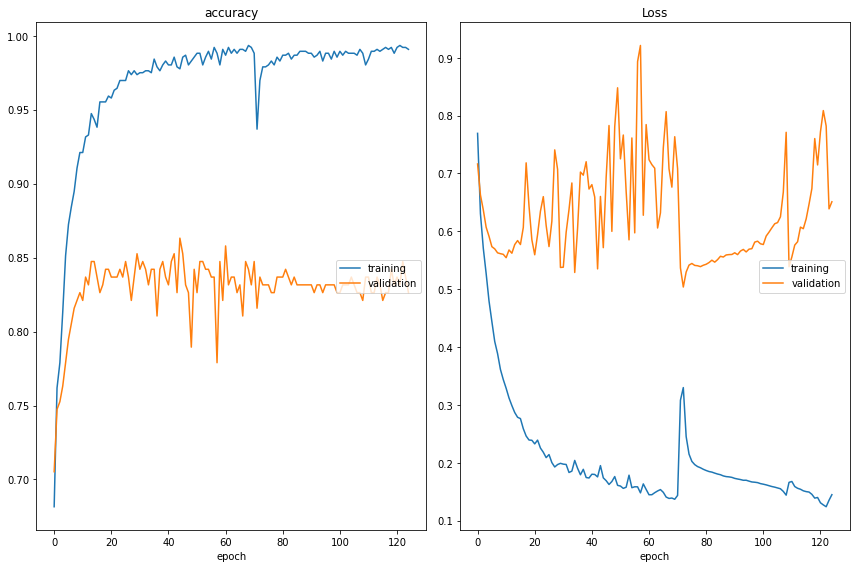

accuracy
	training         	 (min:    0.682, max:    0.993, cur:    0.991)
	validation       	 (min:    0.705, max:    0.863, cur:    0.826)
Loss
	training         	 (min:    0.124, max:    0.769, cur:    0.145)
	validation       	 (min:    0.504, max:    0.921, cur:    0.651)
37/37 [==============================] - 0s 4ms/step - loss: 1.7531 - accuracy: 0.7353
Source Accuracy:
Model LSTM-CNN: [0.8541114330291748, 0.7851458787918091]
Target Accuracy:
Model LSTM-CNN: [0.7438297867774963, 0.7353191375732422]


In [228]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history42 = modellstmcnn.fit(sd2_data_train, sd2_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd2_data_test, sd2_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

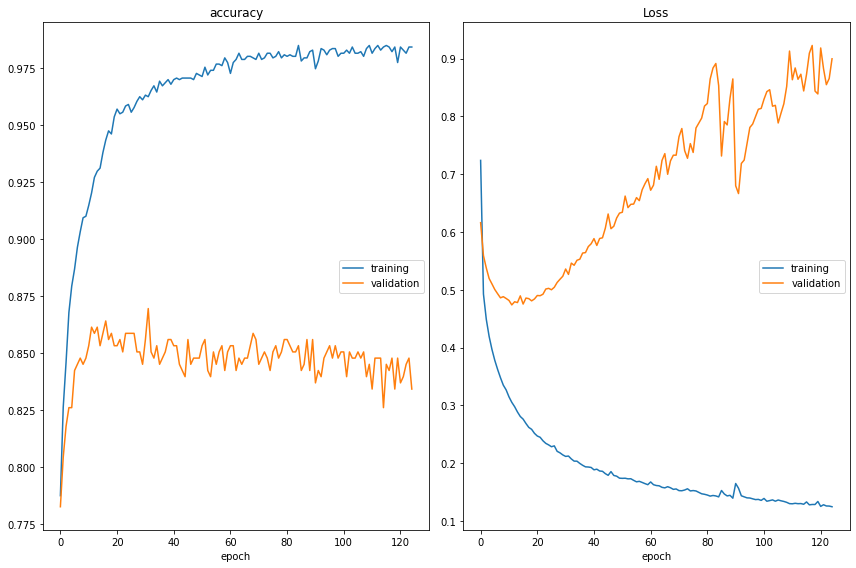

accuracy
	training         	 (min:    0.787, max:    0.985, cur:    0.984)
	validation       	 (min:    0.783, max:    0.870, cur:    0.834)
Loss
	training         	 (min:    0.125, max:    0.724, cur:    0.125)
	validation       	 (min:    0.474, max:    0.923, cur:    0.900)
37/37 [==============================] - 0s 5ms/step - loss: 0.5051 - accuracy: 0.8502
Source Accuracy:
Model LSTM-CNN: [0.8541114330291748, 0.7851458787918091, 0.8063660264015198]
Target Accuracy:
Model LSTM-CNN: [0.7438297867774963, 0.7353191375732422, 0.8502127528190613]


In [229]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_3'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history43 = modellstmcnn.fit(sd3_data_train, sd3_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd3_data_test, sd3_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

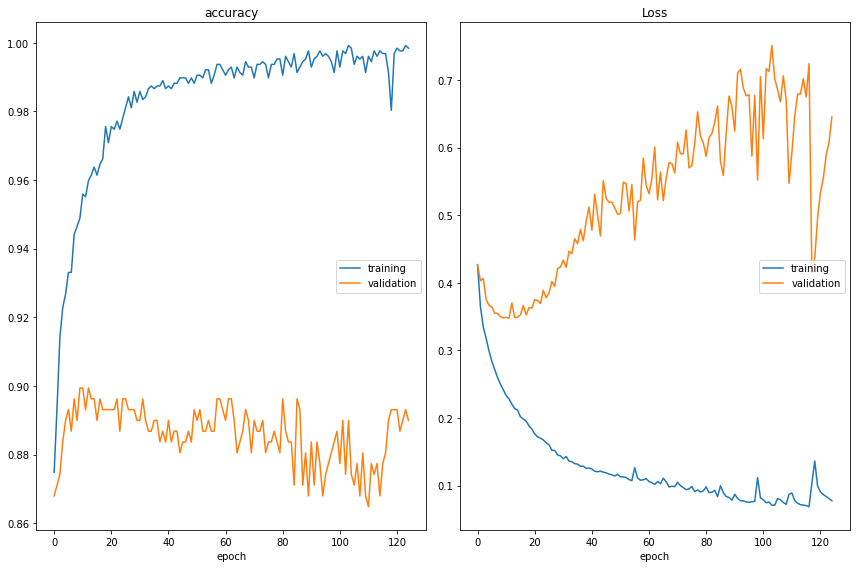

accuracy
	training         	 (min:    0.875, max:    0.999, cur:    0.998)
	validation       	 (min:    0.865, max:    0.899, cur:    0.890)
Loss
	training         	 (min:    0.069, max:    0.427, cur:    0.078)
	validation       	 (min:    0.348, max:    0.751, cur:    0.646)
37/37 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.8460
Source Accuracy:
Model LSTM-CNN: [0.8541114330291748, 0.7851458787918091, 0.8063660264015198, 0.8063660264015198]
Target Accuracy:
Model LSTM-CNN: [0.7438297867774963, 0.7353191375732422, 0.8502127528190613, 0.8459574580192566]


In [230]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_4'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True) 

history44 = modellstmcnn.fit(sd4_data_train, sd4_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd4_data_test, sd4_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

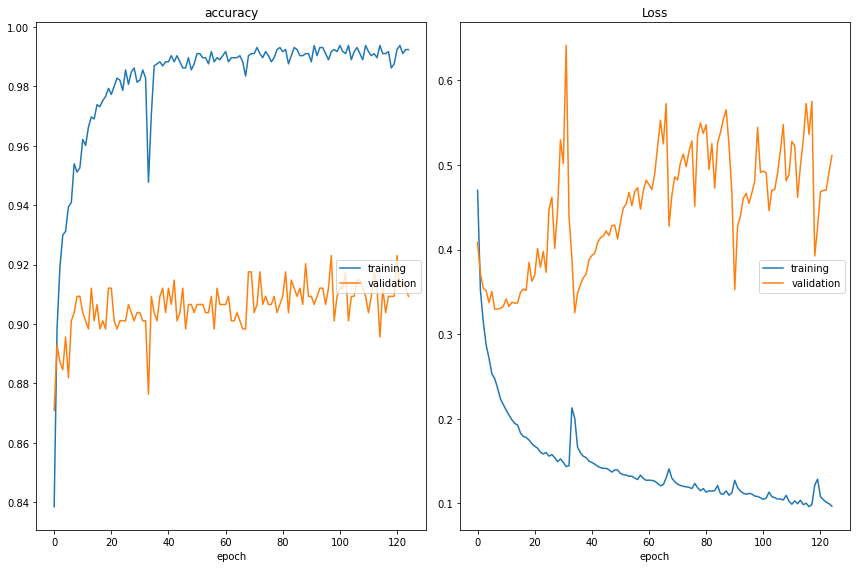

accuracy
	training         	 (min:    0.838, max:    0.994, cur:    0.992)
	validation       	 (min:    0.871, max:    0.923, cur:    0.909)
Loss
	training         	 (min:    0.096, max:    0.470, cur:    0.097)
	validation       	 (min:    0.325, max:    0.641, cur:    0.511)
37/37 [==============================] - 0s 4ms/step - loss: 0.5025 - accuracy: 0.8630
Source Accuracy:
Model LSTM-CNN: [0.8541114330291748, 0.7851458787918091, 0.8063660264015198, 0.8063660264015198, 0.7931034564971924]
Target Accuracy:
Model LSTM-CNN: [0.7438297867774963, 0.7353191375732422, 0.8502127528190613, 0.8459574580192566, 0.8629786968231201]


In [231]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history45 = modellstmcnn.fit(sd5_data_train, sd5_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd5_data_test, sd5_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

# Lifelong Learning

In [232]:
cum_source_acc_1 = []
cum_source_acc_2 = []
cum_source_acc_3 = []
cum_source_acc_4 = []

cum_target_acc_1 = []
cum_target_acc_2 = []
cum_target_acc_3 = []
cum_target_acc_4 = []

cum_source_acc_1.append(source_acc_1)
cum_source_acc_2.append(source_acc_2)
cum_source_acc_3.append(source_acc_3)
cum_source_acc_4.append(source_acc_4)

cum_target_acc_1.append(target_acc_1)
cum_target_acc_2.append(target_acc_2)
cum_target_acc_3.append(target_acc_3)
cum_target_acc_4.append(target_acc_4)

lok_1 = pd.DataFrame(cum_source_acc_1)
lok_2 = pd.DataFrame(cum_source_acc_2)
lok_3 = pd.DataFrame(cum_source_acc_3)
lok_4 = pd.DataFrame(cum_source_acc_4)

tk_1 = pd.DataFrame(cum_target_acc_1)
tk_2 = pd.DataFrame(cum_target_acc_2)
tk_3 = pd.DataFrame(cum_target_acc_3)
tk_4 = pd.DataFrame(cum_target_acc_4)

lok_1.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
lok_2.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
lok_3.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
lok_4.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']

tk_1.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
tk_2.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
tk_3.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
tk_4.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']

lok_1.loc['mean CNN'] = lok_1.mean()
lok_2.loc['mean LSTM'] = lok_2.mean()
lok_3.loc['mean CNN-LSTM'] = lok_3.mean()
lok_4.loc['mean LSTM-CNN'] = lok_4.mean()

tk_1.loc['mean CNN'] = tk_1.mean()
tk_2.loc['mean LSTM'] = tk_2.mean()
tk_3.loc['mean CNN-LSTM'] = tk_3.mean()
tk_4.loc['mean LSTM-CNN'] = tk_4.mean()

print('Loss of Knowledge')
print('Model CNN:')
display(lok_1.loc['mean CNN'])

print('Model LSTM:')
display(lok_2.loc['mean LSTM'])

print('Model CNN-LSTM:')
display(lok_3.loc['mean CNN-LSTM'])

print('Model LSTM-CNN:')
display(lok_4.loc['mean LSTM-CNN'])

print('\n','\n','---------------------------------------------------------------------','\n','\n')

print('Transfer Knowledge')
print('Model CNN:')
display(tk_1.loc['mean CNN'])

print('Model LSTM:')
display(tk_2.loc['mean LSTM'])

print('Model CNN-LSTM:')
display(tk_3.loc['mean CNN-LSTM'])

print('Model LSTM-CNN:')
display(tk_4.loc['mean LSTM-CNN'])

Loss of Knowledge
Model CNN:


SD 1    0.875066
SD 2    0.810875
SD 3    0.740584
SD 4    0.750928
SD 5    0.707427
Name: mean CNN, dtype: float64

Model LSTM:


SD 1    0.853846
SD 2    0.834748
SD 3    0.834483
SD 4    0.835544
SD 5    0.812202
Name: mean LSTM, dtype: float64

Model CNN-LSTM:


SD 1    0.866578
SD 2    0.846154
SD 3    0.832361
SD 4    0.827851
SD 5    0.791512
Name: mean CNN-LSTM, dtype: float64

Model LSTM-CNN:


SD 1    0.855438
SD 2    0.810345
SD 3    0.810875
SD 4    0.815119
SD 5    0.791777
Name: mean LSTM-CNN, dtype: float64


 
 --------------------------------------------------------------------- 
 

Transfer Knowledge
Model CNN:


SD 1    0.720085
SD 2    0.830298
SD 3    0.852426
SD 4    0.856766
SD 5    0.853362
Name: mean CNN, dtype: float64

Model LSTM:


SD 1    0.709787
SD 2    0.799745
SD 3    0.842809
SD 4    0.846809
SD 5    0.823574
Name: mean LSTM, dtype: float64

Model CNN-LSTM:


SD 1    0.719574
SD 2    0.806128
SD 3    0.833787
SD 4    0.853106
SD 5    0.847234
Name: mean CNN-LSTM, dtype: float64

Model LSTM-CNN:


SD 1    0.678638
SD 2    0.799574
SD 3    0.836766
SD 4    0.852085
SD 5    0.847574
Name: mean LSTM-CNN, dtype: float64

Text(0.5, 1.0, 'Loss of Knowledge')

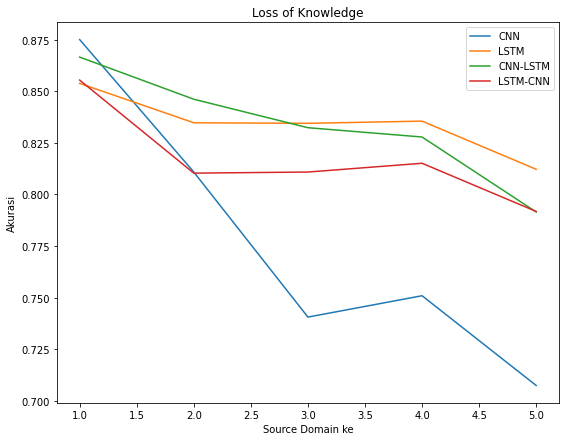

In [233]:
plt.rcParams["figure.figsize"] = [9,7]
plt.plot([1,2,3,4,5],lok_1.loc['mean CNN'],label='CNN')
plt.plot([1,2,3,4,5],lok_2.loc['mean LSTM'],label='LSTM')
plt.plot([1,2,3,4,5],lok_3.loc['mean CNN-LSTM'],label='CNN-LSTM')
plt.plot([1,2,3,4,5],lok_4.loc['mean LSTM-CNN'],label='LSTM-CNN')
plt.xlabel("Source Domain ke")
plt.ylabel("Akurasi")
plt.legend()
plt.title('Loss of Knowledge')

Text(0.5, 1.0, 'Transfer Knowledge')

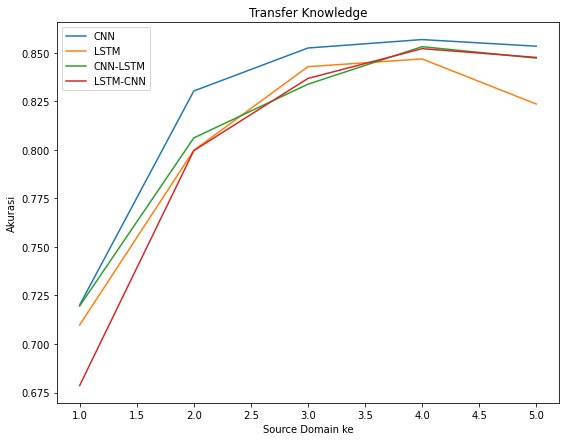

In [234]:
plt.rcParams["figure.figsize"] = [9,7]
plt.plot([1,2,3,4,5],tk_1.loc['mean CNN'],label='CNN')
plt.plot([1,2,3,4,5],tk_2.loc['mean LSTM'],label='LSTM')
plt.plot([1,2,3,4,5],tk_3.loc['mean CNN-LSTM'],label='CNN-LSTM')
plt.plot([1,2,3,4,5],tk_4.loc['mean LSTM-CNN'],label='LSTM-CNN')
plt.xlabel("Source Domain ke")
plt.ylabel("Akurasi")
plt.legend()
plt.title('Transfer Knowledge')

In [235]:
TK=pd.concat([tk_1,tk_2,tk_3,tk_4])
LOK=pd.concat([lok_1,lok_2,lok_3,lok_4])
TK.to_csv(r'/content/drive/My Drive/Data/TK.csv')
LOK.to_csv(r'/content/drive/My Drive/Data/LOK.csv')

In [236]:
pd.read_csv('/content/drive/My Drive/Data/TK.csv')

,Unnamed: 0,SD 1,SD 2,SD 3,SD 4,SD 5
0,0,0.741277,0.840000,0.854468,0.861277,0.866383
1,1,0.737021,0.834894,0.858723,0.854468,0.860426
2,2,0.739574,0.828936,0.850213,0.855319,0.862128
3,3,0.725106,0.826383,0.845106,0.868085,0.840000
4,4,0.717447,0.828085,0.852766,0.860426,0.850213
5,5,0.737872,0.830638,0.850213,0.854468,0.845106
6,6,0.737872,0.833192,0.856170,0.864681,0.853617
7,7,0.702979,0.822979,0.857021,0.852766,0.854468
8,8,0.664681,0.821277,0.846808,0.840851,0.849362
9,9,0.697021,0.836596,0.852766,0.855319,0.851915


In [237]:
pd.read_csv('/content/drive/My Drive/Data/LOK.csv')

,Unnamed: 0,SD 1,SD 2,SD 3,SD 4,SD 5
0,0,0.867374,0.814324,0.763926,0.779841,0.718833
1,1,0.885942,0.809019,0.755968,0.758621,0.684350
2,2,0.880637,0.803714,0.716180,0.748011,0.660477
3,3,0.875332,0.793103,0.729443,0.734748,0.687003
4,4,0.880637,0.822281,0.737401,0.753316,0.718833
5,5,0.872679,0.795756,0.729443,0.755968,0.713528
6,6,0.872679,0.824934,0.732095,0.763926,0.729443
7,7,0.872679,0.793103,0.755968,0.726790,0.726790
8,8,0.870027,0.824934,0.766578,0.753316,0.710875
9,9,0.872679,0.827586,0.718833,0.734748,0.724138
